# Libraries

In [76]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

In [3]:
!pip install selenium
!pip install plotly
!pip install cufflinks

# Import Dataset

In [81]:
df=pd.read_csv(r'D:\Python- tamrin vase khodam\Uber Stock\UBER.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
5,2019-05-17,41.980000,43.290001,41.270000,41.910000,41.910000,20225700
6,2019-05-20,41.189999,41.680000,39.459999,41.590000,41.590000,29222300
7,2019-05-21,42.000000,42.240002,41.250000,41.500000,41.500000,10802900
8,2019-05-22,41.049999,41.279999,40.500000,41.250000,41.250000,9089500
9,2019-05-23,40.799999,41.090000,40.020000,40.470001,40.470001,11119900


# EDA 

In [10]:
# Shape

df.shape

(725, 7)

In [11]:
# Statistical Facts

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,725.000000,725.000000,725.000000,725.000000,725.000000,7.250000e+02
mean,40.166447,40.961435,39.261123,40.107255,40.107255,2.472855e+07
std,9.198940,9.259164,9.075919,9.141862,9.141862,1.691406e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,32.730000,33.419998,31.983000,32.799999,32.799999,1.423060e+07
50%,39.000000,39.959999,38.009998,38.810001,38.810001,2.079540e+07
75%,46.700001,47.520000,45.860001,46.419998,46.419998,3.011960e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       725 non-null    object 
 1   Open       725 non-null    float64
 2   High       725 non-null    float64
 3   Low        725 non-null    float64
 4   Close      725 non-null    float64
 5   Adj Close  725 non-null    float64
 6   Volume     725 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 39.8+ KB


In [14]:
# duplicates check

df.duplicated().sum()

0

In [16]:
# null values check

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#  Data Visualization 

C:\Users\Sahand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sahand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sahand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='Volume', ylabel='Density'>

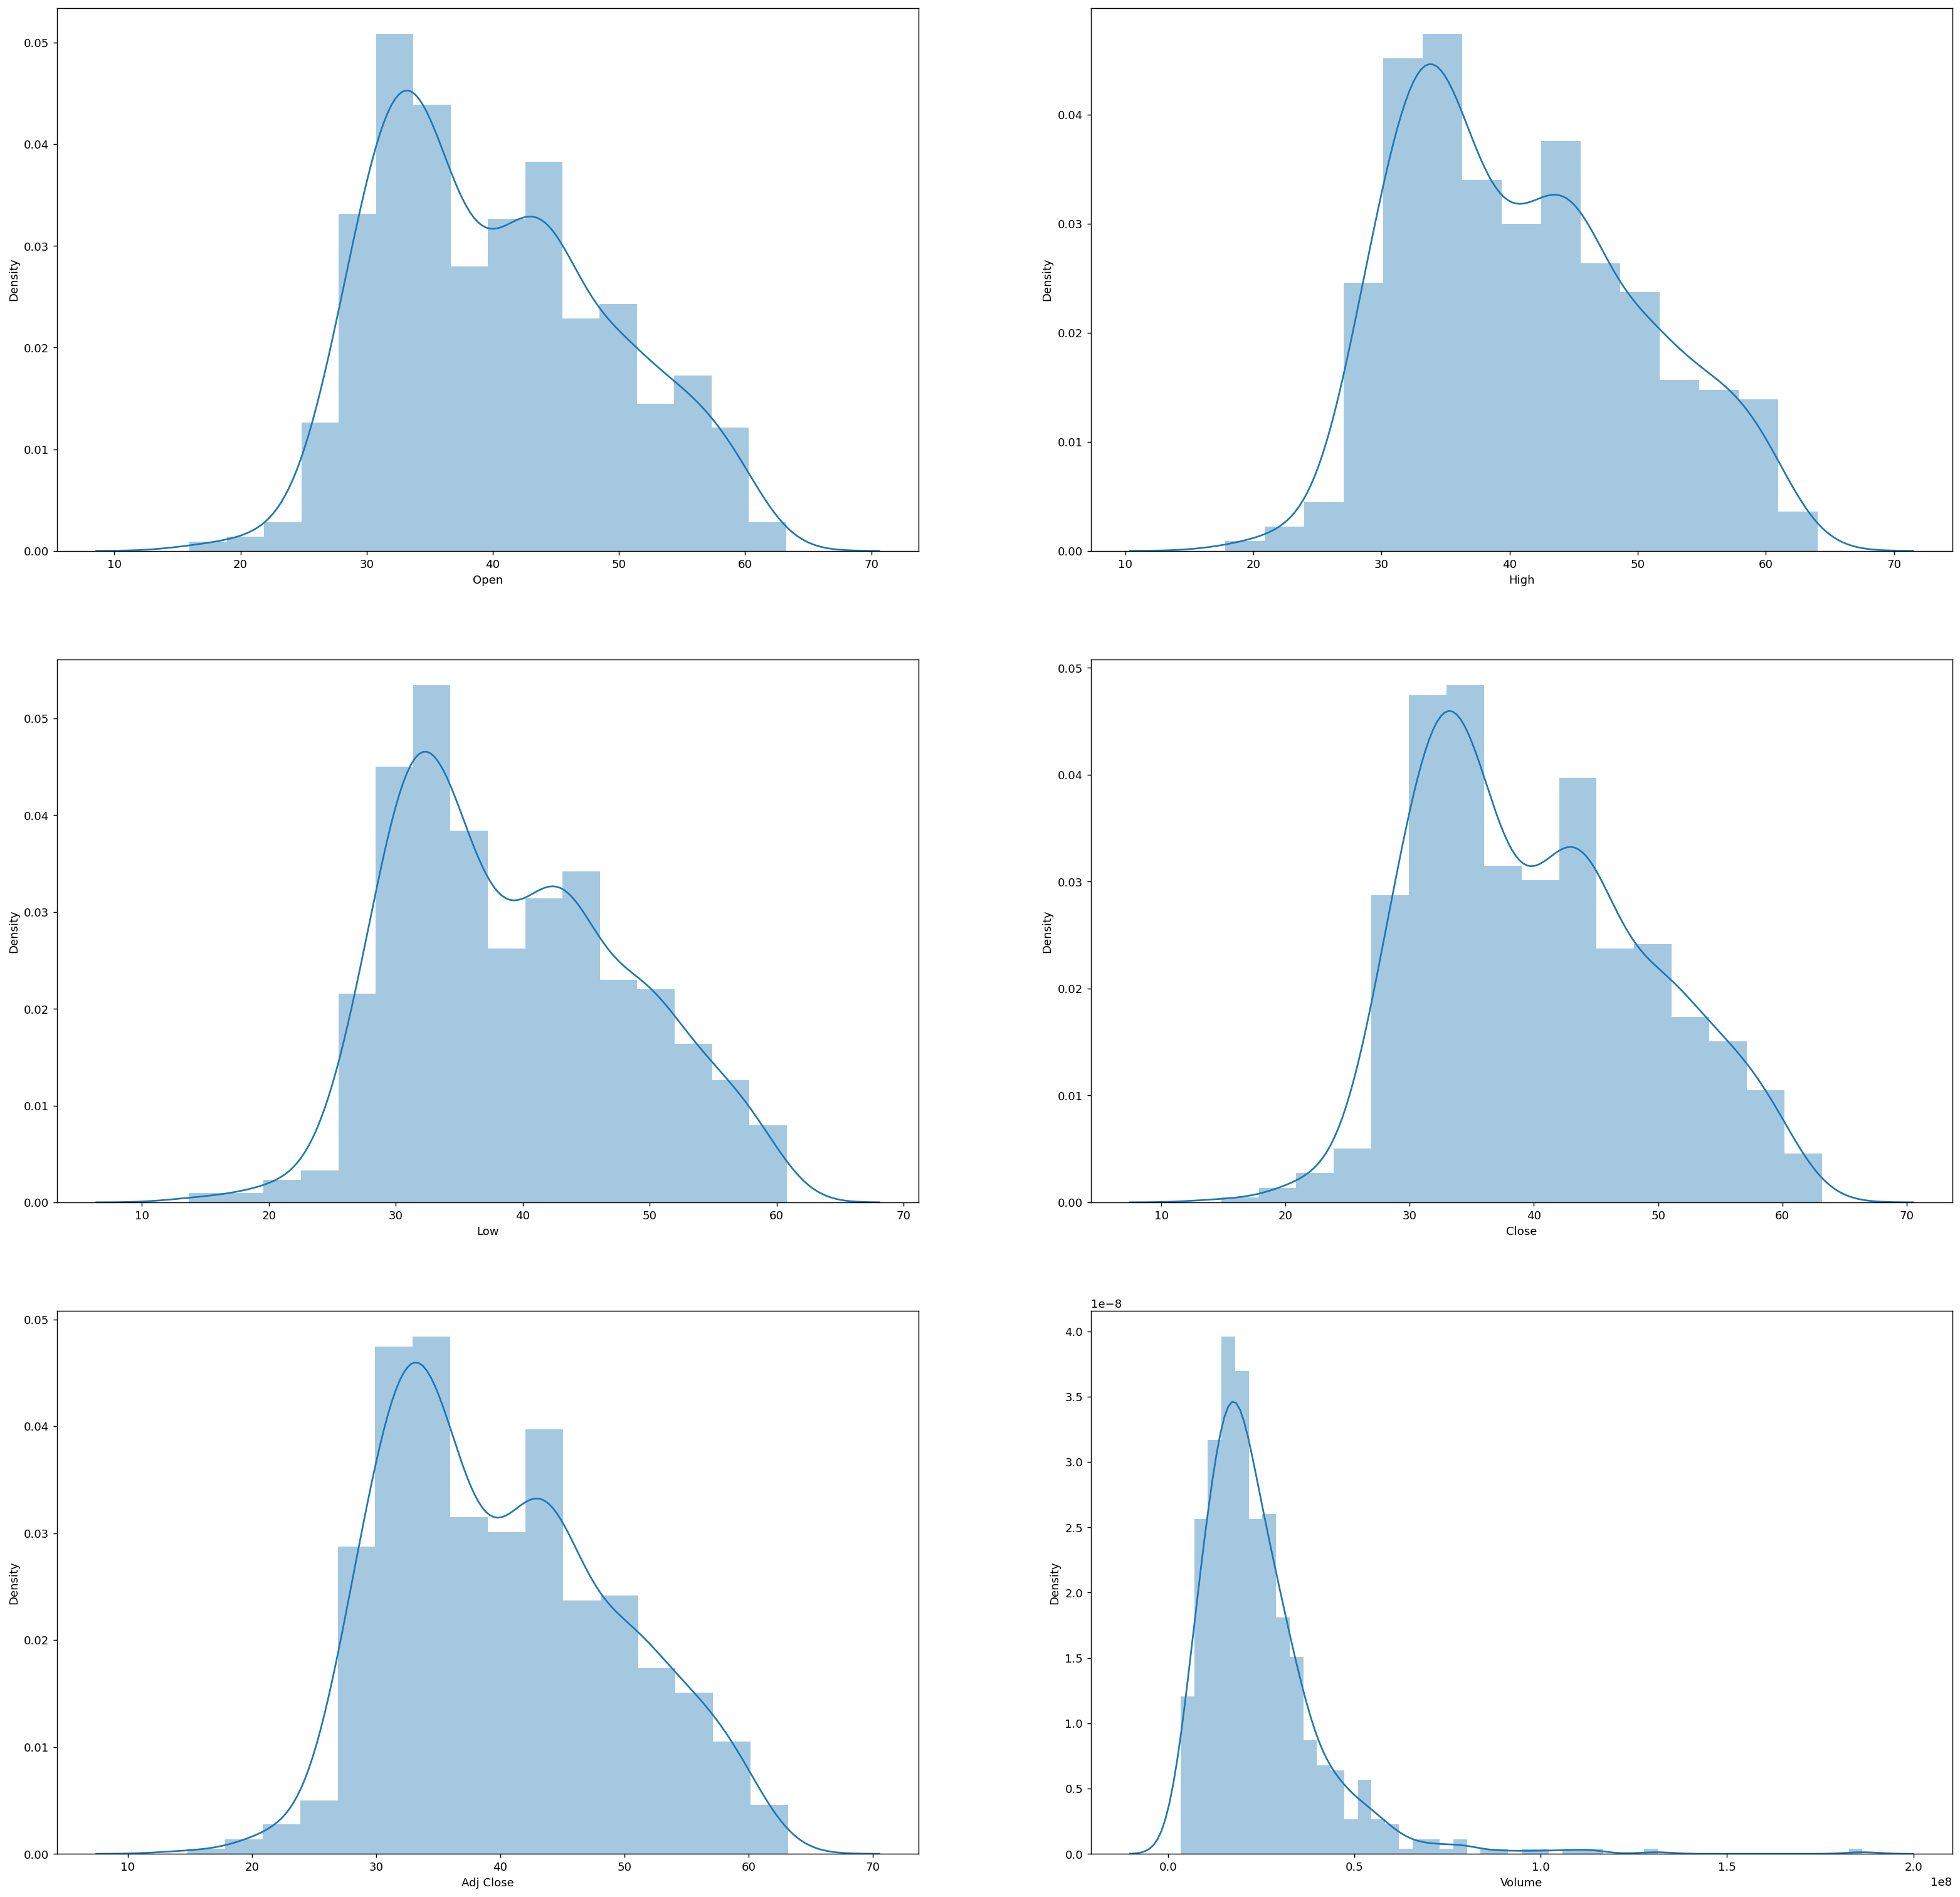

In [21]:
fig, axs= plt.subplots(3,2, figsize=(30,30), dpi=130)


sns.distplot(df["Open"], ax=axs[0, 0])
sns.distplot(df["High"], ax=axs[0, 1])
sns.distplot(df["Low"], ax=axs[1, 0])
sns.distplot(df["Close"], ax=axs[1, 1])
sns.distplot(df["Adj Close"], ax=axs[2, 0])
sns.distplot(df["Volume"], ax=axs[2, 1])

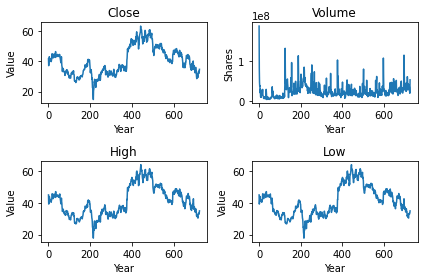

In [40]:
# Having better comparative 

plt.subplot(2, 2, 1)
df.Close.plot(kind='line')

plt.title('Close')
plt.ylabel('Value')
plt.xlabel('Year')


plt.subplot(2, 2, 2)
df.Volume.plot(kind='line')

plt.title('Volume')
plt.ylabel('Shares')
plt.xlabel('Year')

plt.subplot(2, 2, 3)
df.High.plot(kind='line')

plt.title('High')
plt.ylabel('Value')
plt.xlabel('Year')

plt.subplot(2, 2, 4)
df.High.plot(kind='line')

plt.title('Low')
plt.ylabel('Value')
plt.xlabel('Year')



plt.tight_layout()
plt.show()

# Analyzing Uber Adj Close

In [50]:
fig = px.line(df, x="Date", y="Adj Close",title = 'Uber Adj Close')
fig.show()

# Calculating the Market Cap

In [41]:
df['Market Cap'] = df['Open']*df['Volume']

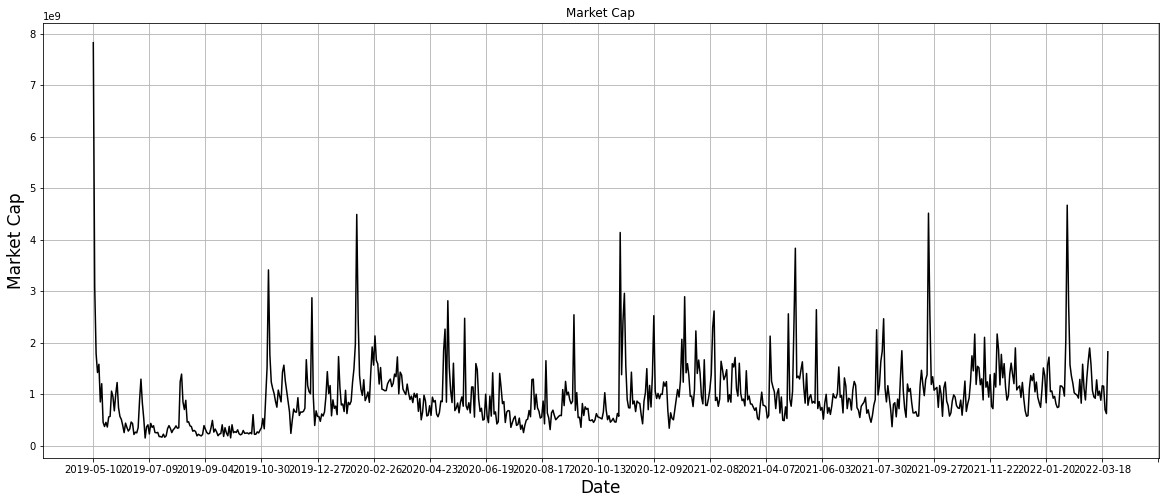

In [46]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Market Cap'], color='black')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.set_xlabel('Date', fontsize='17')
ax.set_ylabel('Market Cap', fontsize='17')
plt.title('Market Cap')
plt.grid()
plt.show()

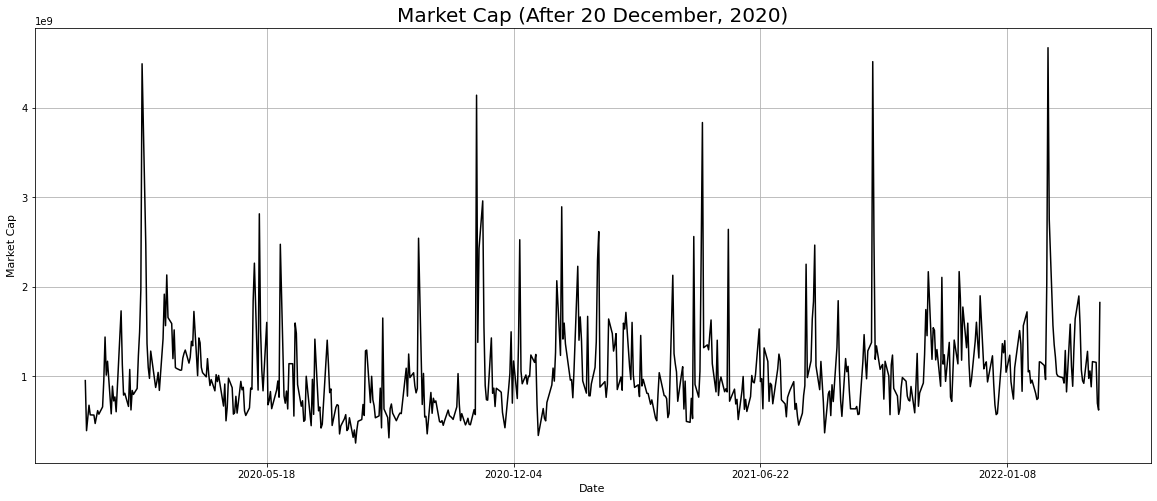

In [67]:
ohlc = df[(df['Date'] > '2019-12-20')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Market Cap'], color='black')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.grid()
plt.title('Market Cap (After 20 December, 2020)', fontsize='20')
plt.show()

# Predictive Analysis

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        725 non-null    object 
 1   Open        725 non-null    float64
 2   High        725 non-null    float64
 3   Low         725 non-null    float64
 4   Close       725 non-null    float64
 5   Adj Close   725 non-null    float64
 6   Volume      725 non-null    int64  
 7   Market Cap  725 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.4+ KB


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
import sklearn
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import pickle
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Plotting
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping , ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error

import warnings
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Dealing with "Date" Column

df["Date"]=pd.to_datetime(df.Date,dayfirst=True)
df.set_index("Date",inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...
2022-03-18,32.520000,33.419998,32.330002,33.360001,33.360001,35779700
2022-03-21,32.820000,32.820000,31.250000,31.980000,31.980000,35200600
2022-03-22,31.930000,33.599998,31.840000,33.349998,33.349998,21852800


Text(0, 0.5, 'open price')

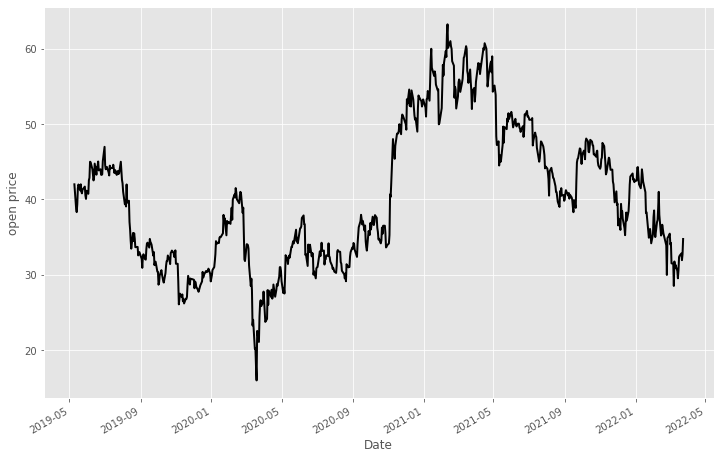

In [85]:
df['Open'].plot(figsize=(12,8), color="black")
plt.ylabel("open price")

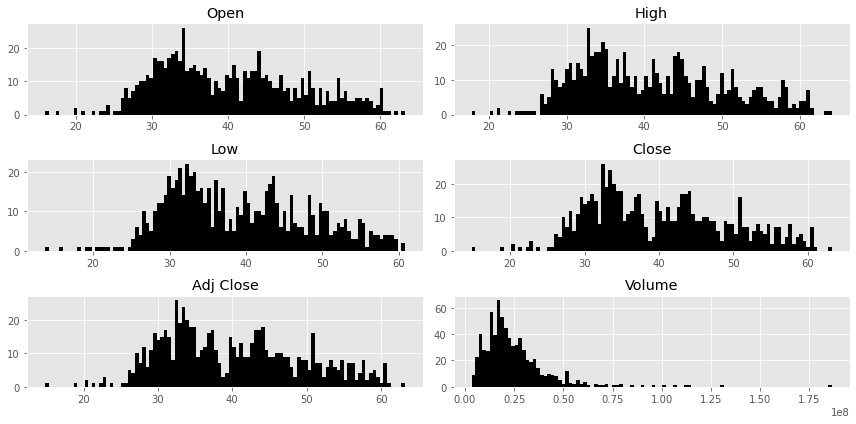

In [87]:
df.hist(bins=100,figsize=(12,6), color='black');
plt.tight_layout()

In [88]:
df.resample(rule='A').mean()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,35.625730,36.214110,34.888012,35.537669,35.537669,1.879827e+07
2020-12-31,35.469802,36.296320,34.633447,35.511660,35.511660,2.767980e+07
2021-12-31,48.733790,49.588691,47.700925,48.610040,48.610040,2.335221e+07
2022-12-31,36.121140,37.102123,34.994263,35.981403,35.981403,3.467257e+07


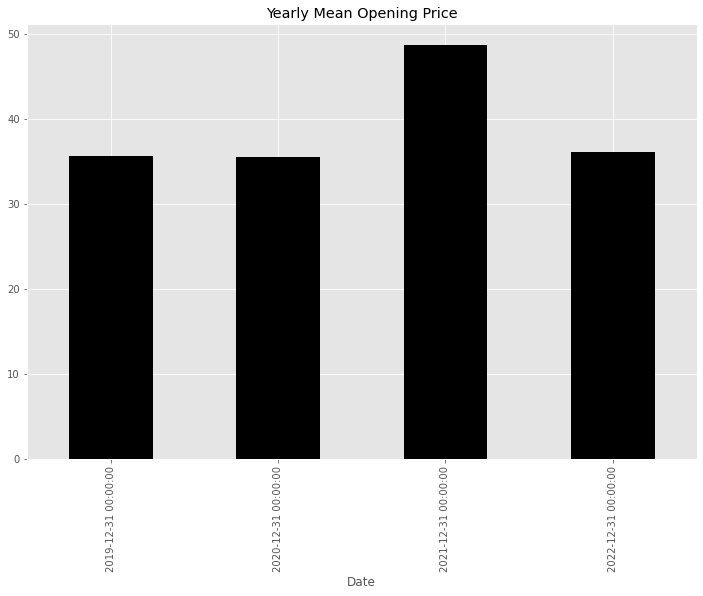

In [99]:
title = 'Yearly Mean Opening Price'
df['Open'].resample('A').mean().plot.bar(title=title,color=['black'] , figsize=(12,8));

In [93]:
df['6-month-SMA'] = df['Open'].rolling(window=6).mean()
df['12-month-SMA'] = df['Open'].rolling(window=12).mean()
df['2-month-SMA'] = df['Open'].rolling(window=2).mean()

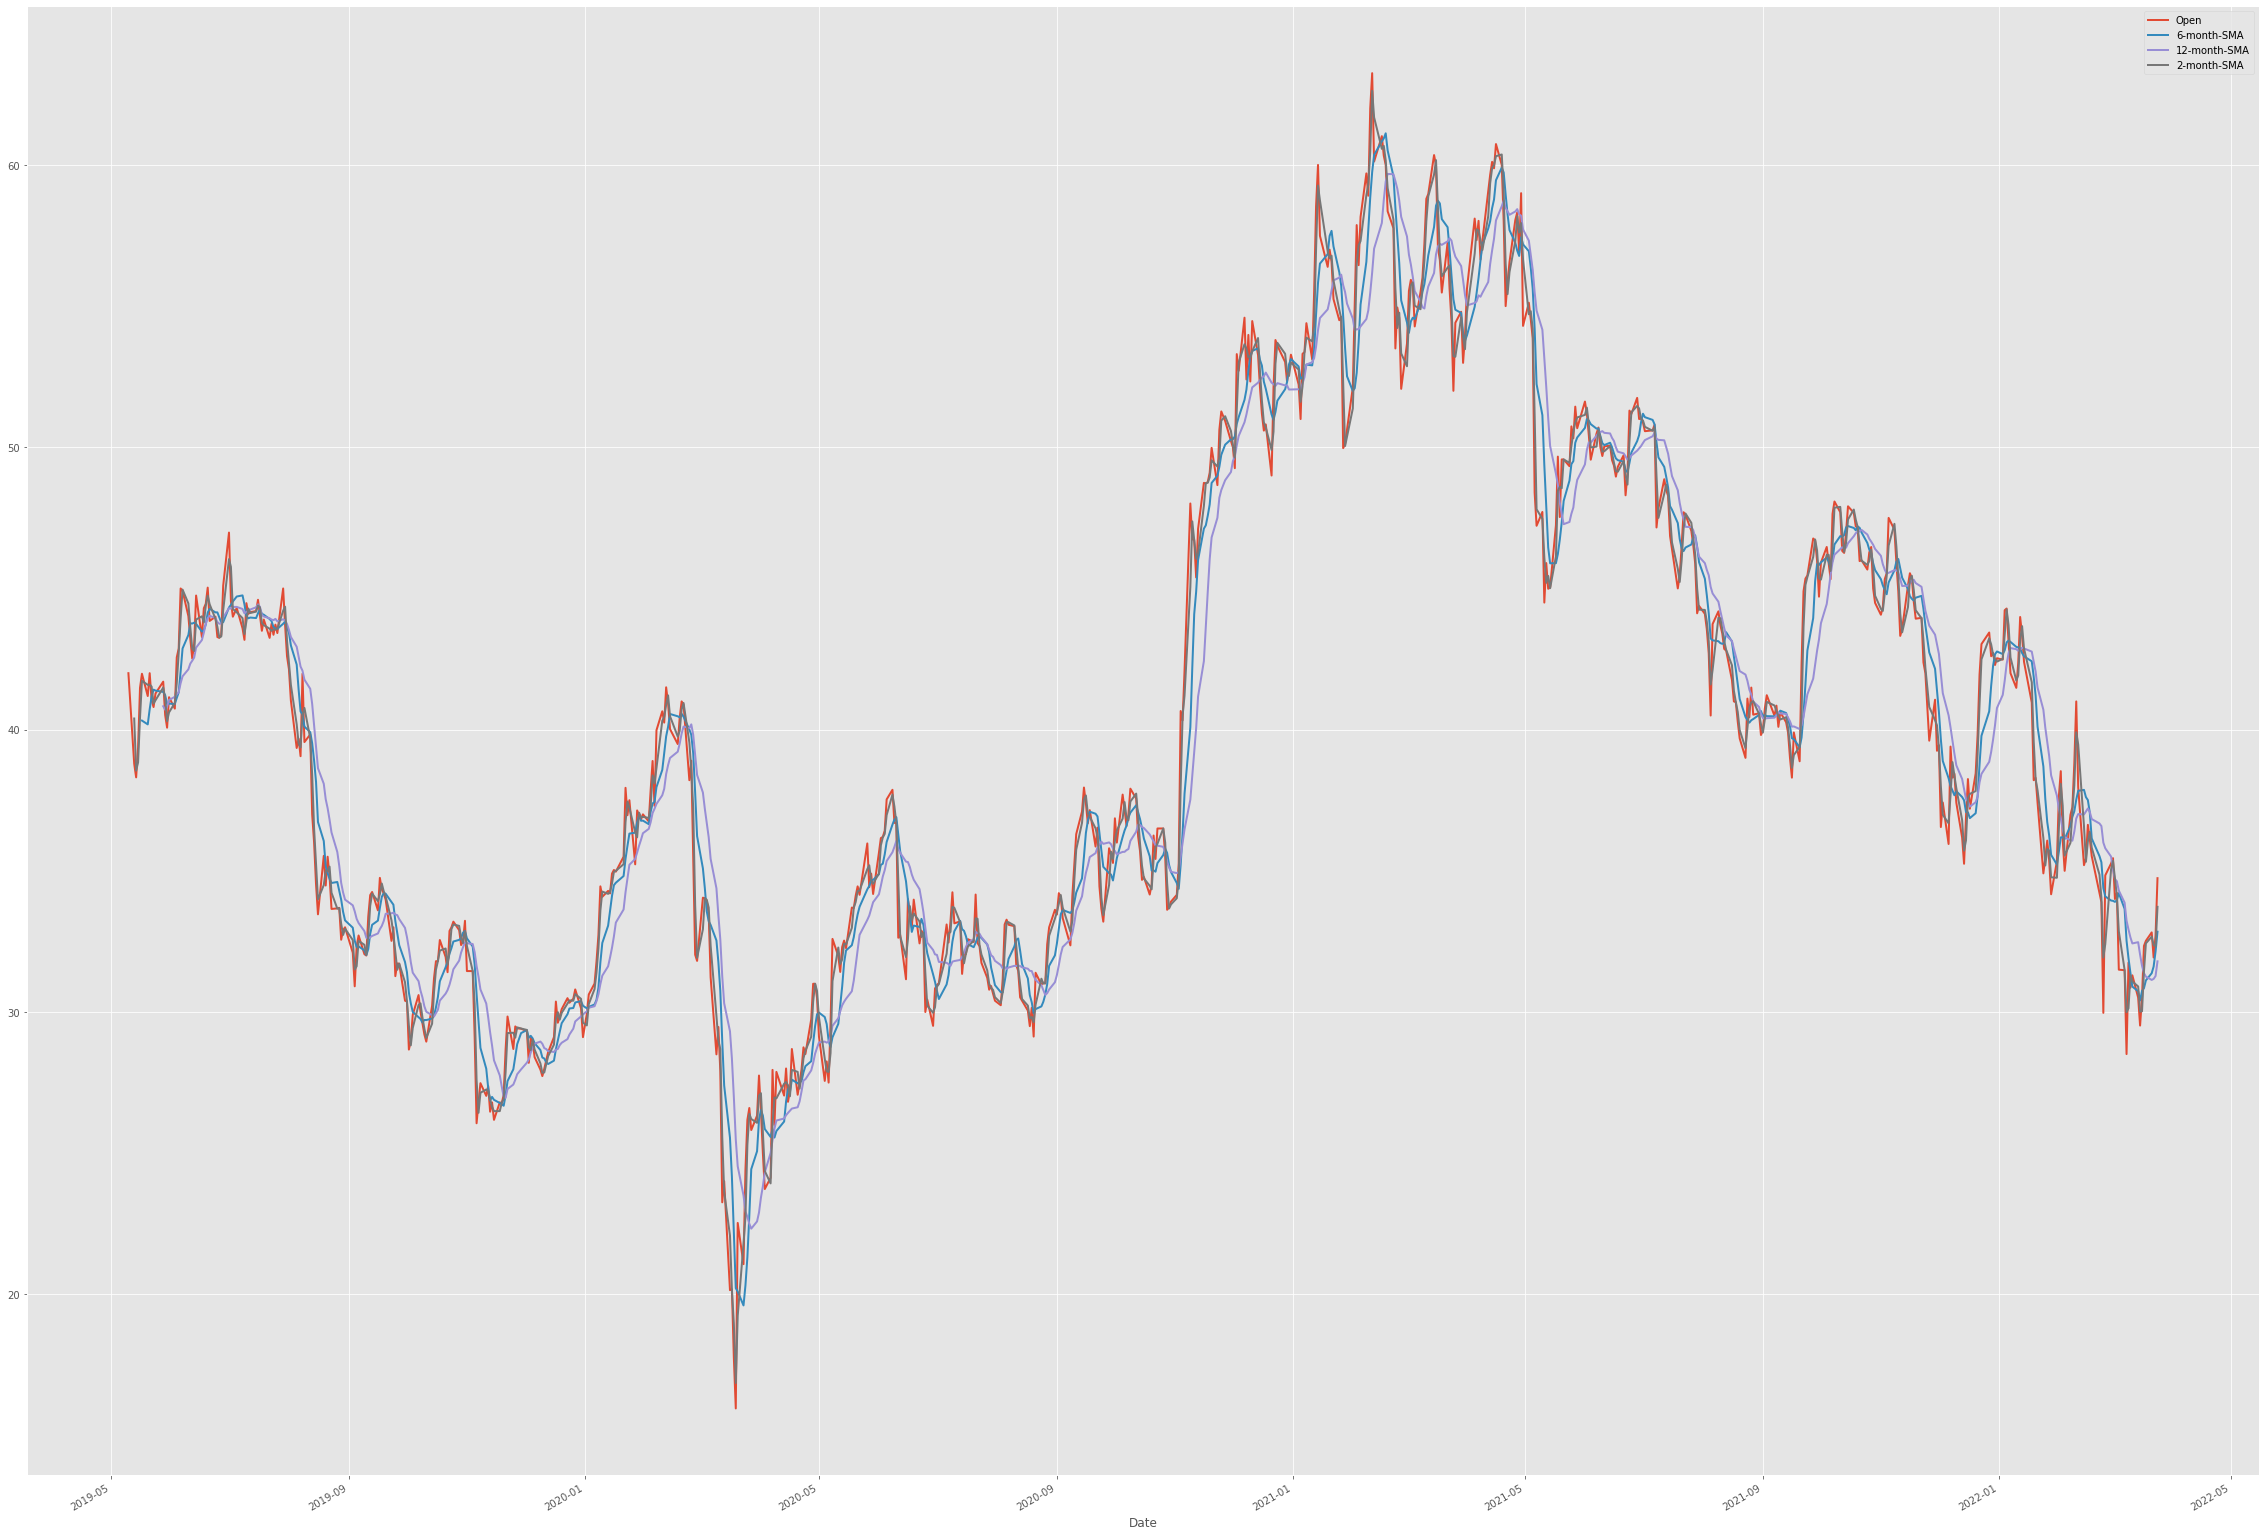

In [95]:
df[["Open","6-month-SMA","12-month-SMA","2-month-SMA"]].plot(figsize=(40,30));

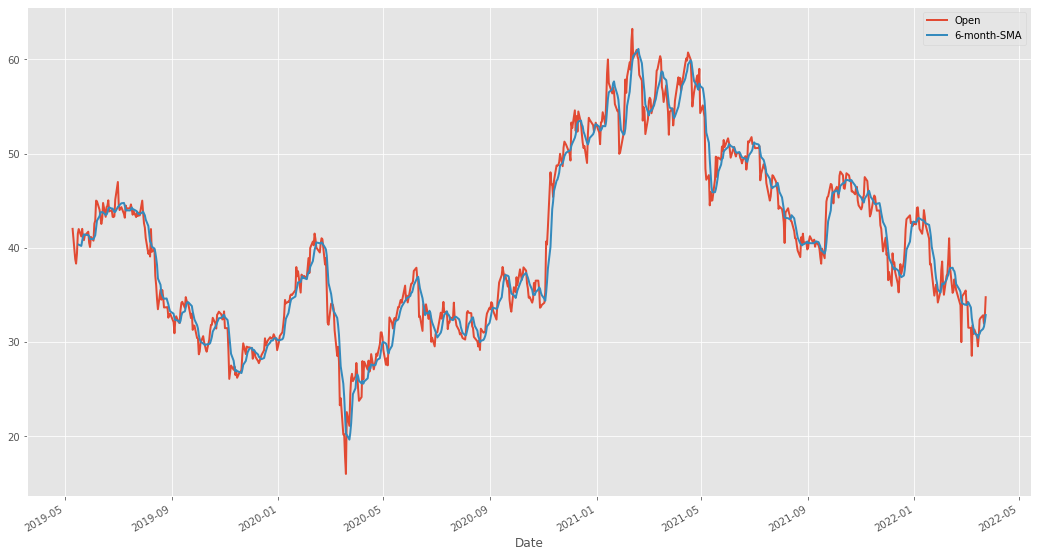

In [97]:
# Focusing on 6 months

df[["Open","6-month-SMA"]].plot(figsize=(18,10));

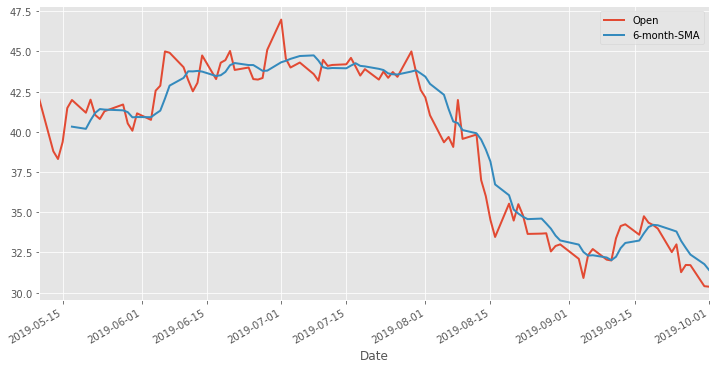

In [98]:
df[['Open','6-month-SMA']].iloc[:100].plot(figsize=(12,6)).autoscale(axis='x',tight=True);


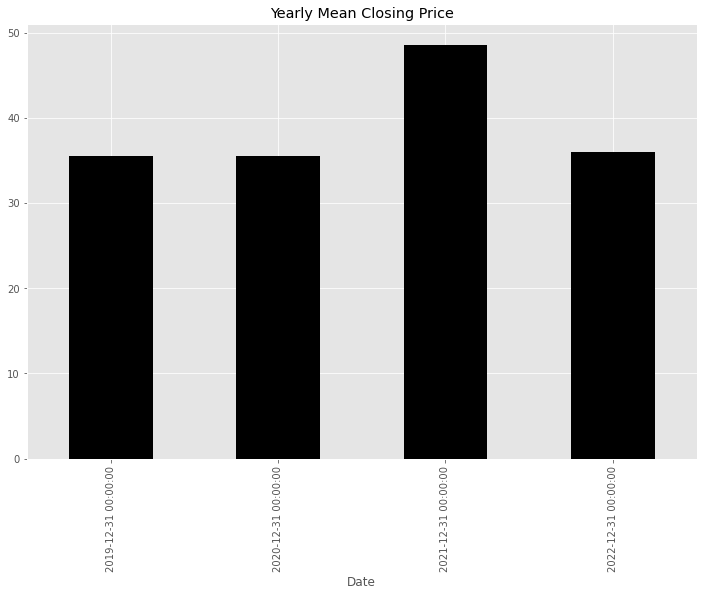

In [100]:
title = 'Yearly Mean Closing Price'
df['Adj Close'].resample('A').mean().plot.bar(title=title,color=['black'] , figsize=(12,8));

In [102]:
df['6-month-SMA'] = df['Adj Close'].rolling(window=6).mean()
df['12-month-SMA'] = df['Adj Close'].rolling(window=12).mean()
df['2-month-SMA'] = df['Adj Close'].rolling(window=2).mean()

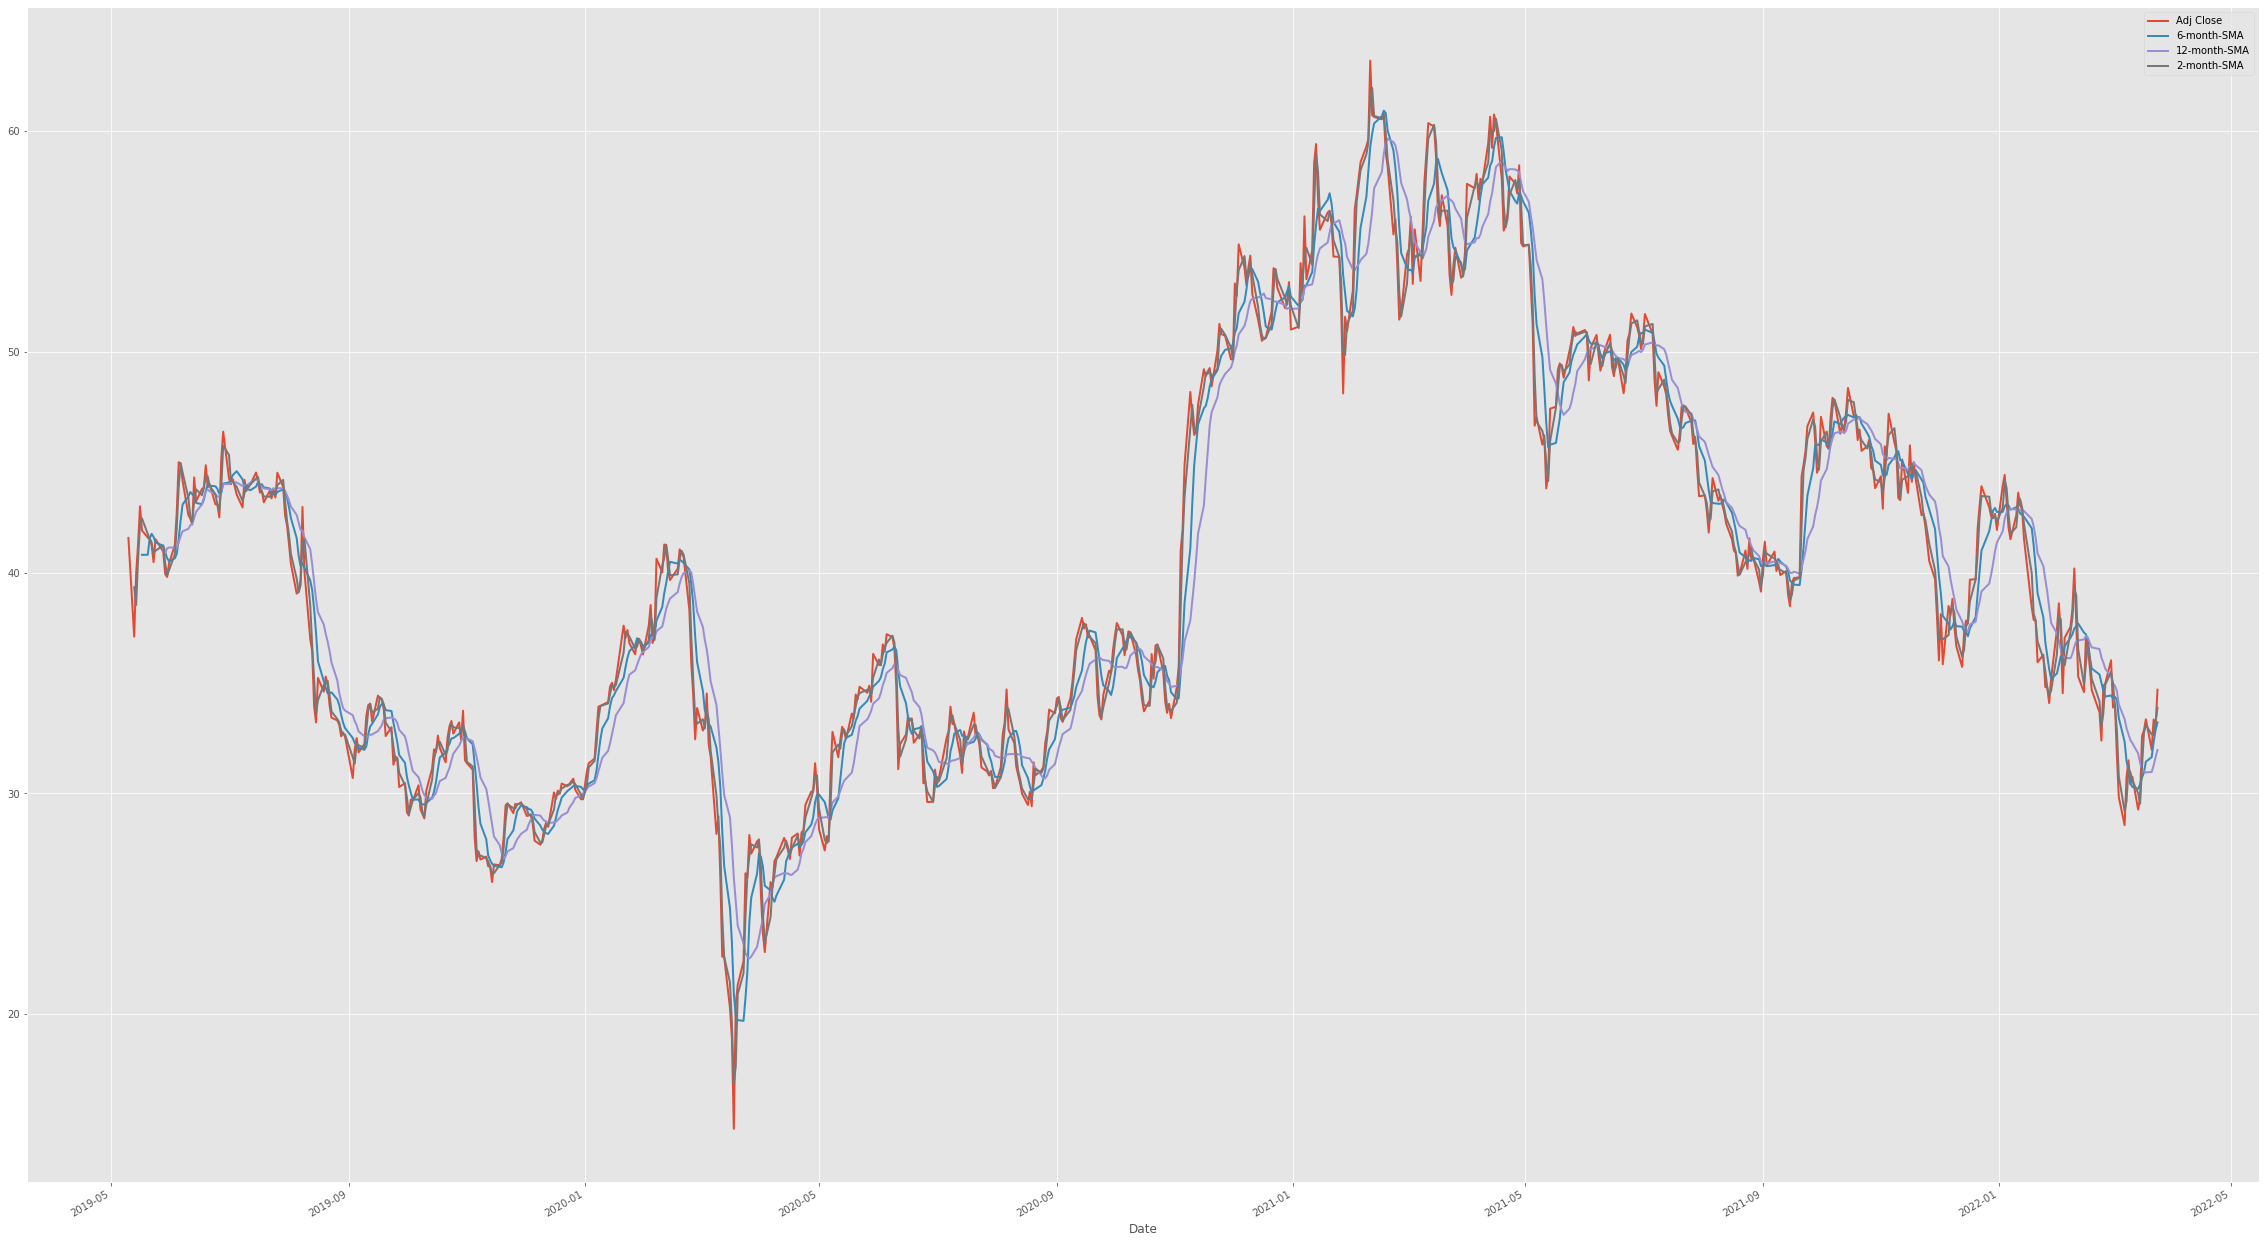

In [103]:
df[["Adj Close","6-month-SMA","12-month-SMA","2-month-SMA"]].plot(figsize=(40,24));

<AxesSubplot:xlabel='Date'>

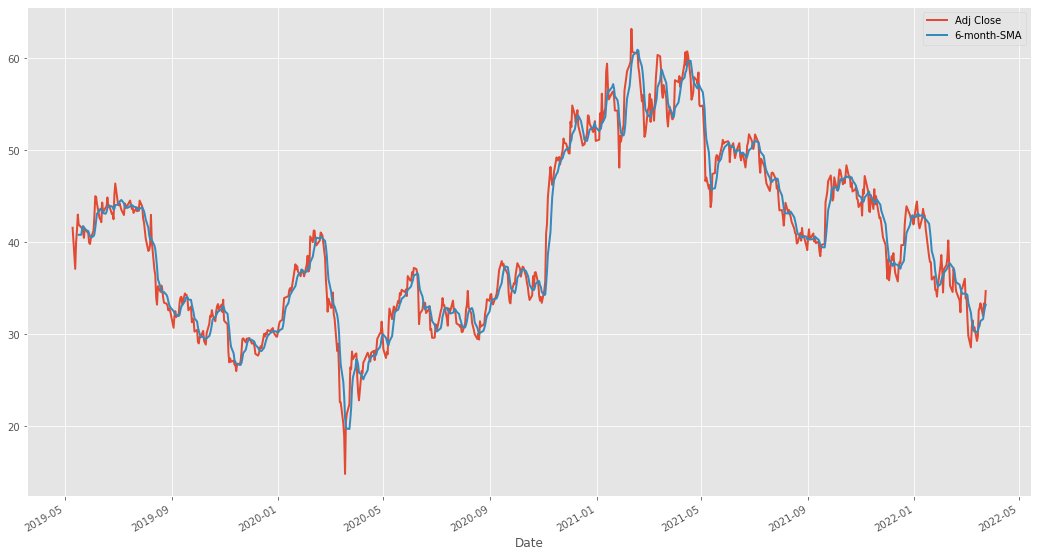

In [105]:
#Focusing on Adj Closing in 6 Months

df[["Adj Close","6-month-SMA"]].plot(figsize=(18,10))

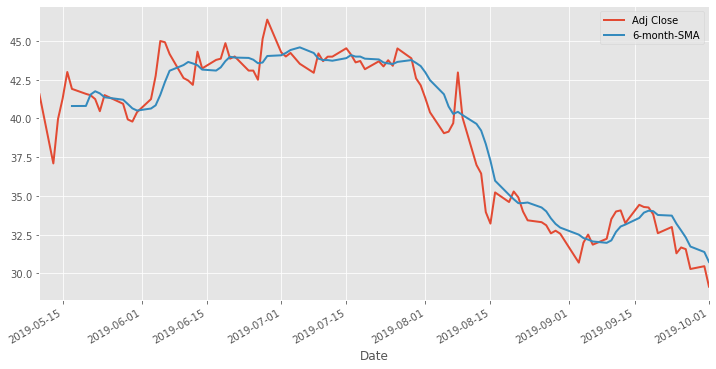

In [106]:
df[['Adj Close','6-month-SMA']].iloc[:100].plot(figsize=(12,6)).autoscale(axis='x',tight=True);


# Modeling

In [107]:
data = df.filter(['Open'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

689

In [108]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [109]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.55064496, 0.48276593, 0.4726158 , 0.49503064, 0.53964897,
       0.55022203, 0.53351658, 0.55064496, 0.53055612, 0.52526959,
       0.53541973, 0.54430114, 0.5193487 , 0.50983295, 0.5326708 ,
       0.52408541, 0.5624868 , 0.56904206, 0.61408332, 0.61239158,
       0.59336012, 0.57644324, 0.56164094, 0.57284836, 0.60879679,
       0.57771197, 0.59928101, 0.60266439, 0.61471768, 0.58976524,
       0.5929372 , 0.57771197, 0.57707761, 0.57919218, 0.61619789,
       0.65595263, 0.60456754, 0.5929372 , 0.59949251, 0.58426729,
       0.57559738, 0.60308733, 0.59505177, 0.59632058, 0.59716644,
       0.60562483, 0.59420598, 0.58236414, 0.59082263, 0.57707761,
       0.58765067, 0.5794037 , 0.5870163 , 0.5806724 , 0.61408332,
       0.5868048 , 0.56333259, 0.55360539, 0.5301332 , 0.4946077 ])]
[0.5015859589765278]

[array([0.55064496, 0.48276593, 0.4726158 , 0.49503064, 0.53964897,
       0.55022203, 0.53351658, 0.55064496, 0.53055612, 0.52526959,
       0.53541973, 0.54430114, 0.519

In [110]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________
